In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.shape

(1599, 12)

In [8]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

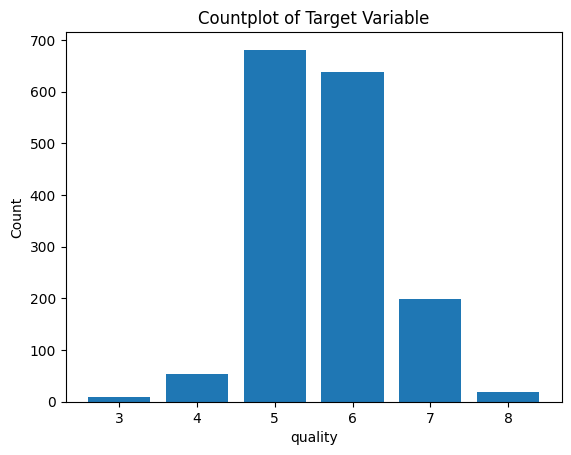

In [9]:
quality_counts = data['quality'].value_counts().sort_index()

# Create a countplot (bar plot) using matplotlib
plt.bar(quality_counts.index, quality_counts.values)

# Set plot labels and title
plt.xlabel('quality')
plt.ylabel('Count')
plt.title('Countplot of Target Variable')
plt.show()

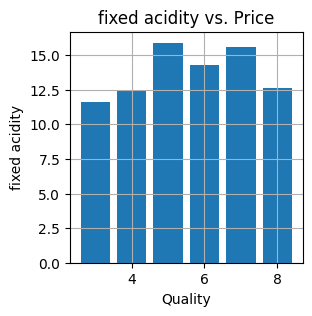

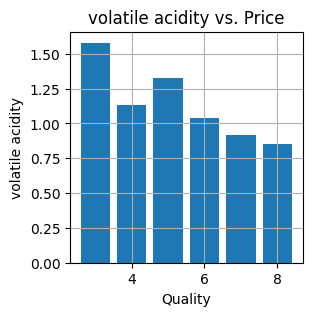

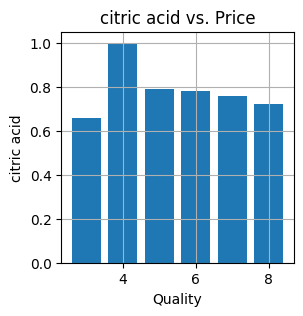

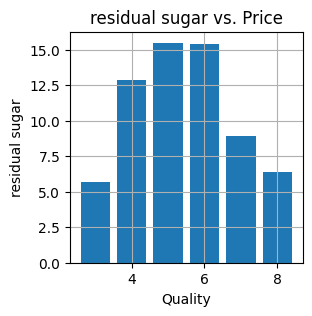

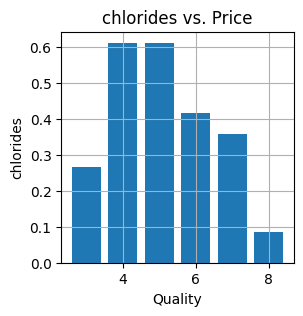

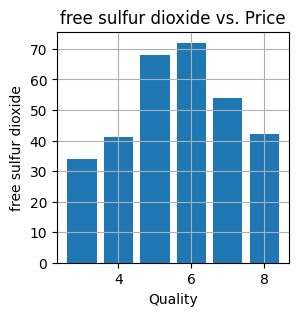

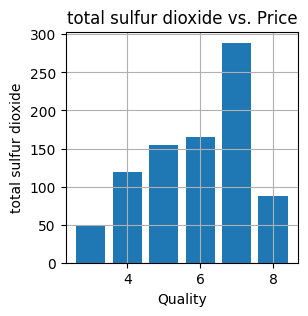

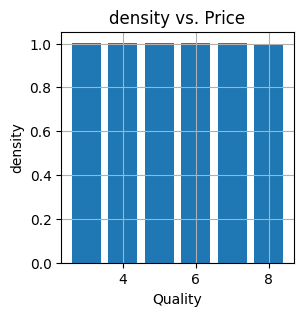

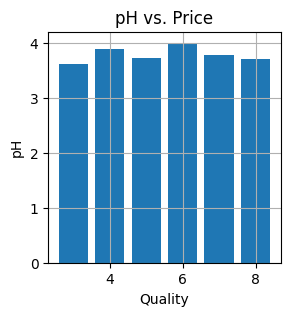

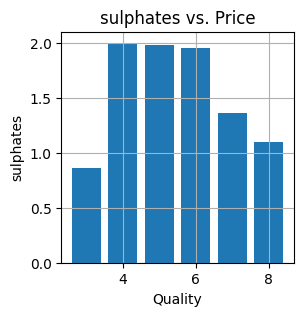

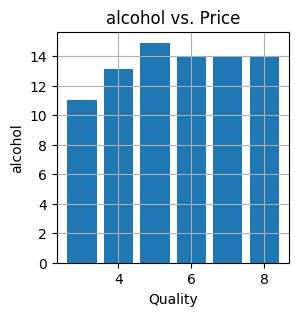

In [10]:
independent_variables = data.drop(['quality'], axis=1).columns

for row in independent_variables:
    plt.figure(figsize=(3, 3))

    plt.bar( data['quality'], data[row], data=data )
    plt.xlabel('Quality')
    plt.ylabel(row)
    plt.title(f'{row} vs. Price')
    
    plt.grid(True)
    plt.show()

In [11]:
data = data.drop(['density'],axis=1)

In [12]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [13]:
data.shape

(1599, 11)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:

y_pred = model.predict(X_test)


In [19]:
y_pred = np.round(y_pred).astype(int)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('R-squared (R2):', r2*100)

R-squared (R2): 40.23655362106216


In [21]:
def mape(Actual,Predict):
    Actual,Predict = np.array(Actual),np.array(Predict)
    
    return np.mean(np.abs((Actual - Predict)/ Actual)) * 100

print('mape : ',mape(y_test,y_pred))

mape :  8.993557763822754


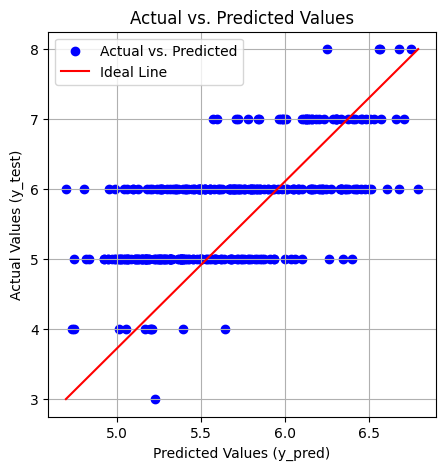

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Ideal Line')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Actual Values (y_test)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



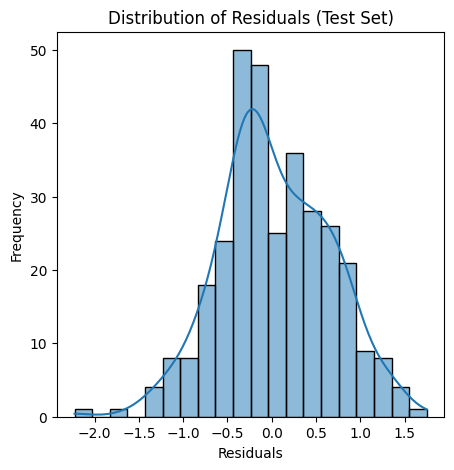

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(5, 5))
sn.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()